# Flipkart Sales Data

## Important library

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


## load dataset

In [33]:
df = pd.read_csv(r"C:\Users\Vikas\Desktop\FUTURE_DS_01\Dataset\flipkart_sales_data.csv")
df.head(3)


,Order ID,Order Date,Product Name,Category,Sub-Category,Quantity Sold,Unit Price (₹),Revenue (₹),Customer Name,Customer Type,Region,Country,Payment Method
0,FLP-2025-1000,2024-06-27,Nike Air Max,Electronics,TV & Appliances,1,66422.24,66422.24,Customer_382,New Customer,Tamil Nadu,India,Cash on Delivery
1,FLP-2025-1001,2024-07-31,OnePlus 11,Jewellery,Bracelets,1,57215.66,57215.66,Customer_3,Returning Customer,Maharashtra,India,Cash on Delivery
2,FLP-2025-1002,2024-03-28,Apple iPhone 15,Electronics,Wearables,2,30712.53,61425.06,Customer_26,New Customer,Uttar Pradesh,India,UPI


In [34]:
df.shape

(1500, 13)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1500 non-null   object 
 1   Order Date      1500 non-null   object 
 2   Product Name    1500 non-null   object 
 3   Category        1500 non-null   object 
 4   Sub-Category    1500 non-null   object 
 5   Quantity Sold   1500 non-null   int64  
 6   Unit Price (₹)  1500 non-null   float64
 7   Revenue (₹)     1500 non-null   float64
 8   Customer Name   1500 non-null   object 
 9   Customer Type   1500 non-null   object 
 10  Region          1500 non-null   object 
 11  Country         1500 non-null   object 
 12  Payment Method  1500 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 152.5+ KB


In [47]:
# Convert Order Date to datetime
df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors='coerce')

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

# Fill missing values - Numerical with mean
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Fill missing values - Categorical with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Remove duplicates
df = df.drop_duplicates()

# Clean column names (replace spaces and special characters with underscores)
df.columns = df.columns.str.replace('[^A-Za-z0-9]+', '_', regex=True)

In [48]:
df.isnull().sum()

Order_ID          0
Order_Date        0
Product_Name      0
Category          0
Sub_Category      0
Quantity_Sold     0
Unit_Price_       0
Revenue_          0
Customer_Name     0
Customer_Type     0
Region            0
Country           0
Payment_Method    0
dtype: int64

In [50]:
df.shape

(1481, 13)

# Remove outliers using IQR

In [53]:

# Remove outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [54]:

# Scale numerical columns using MinMaxScaler
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [55]:
df.shape

(1460, 13)

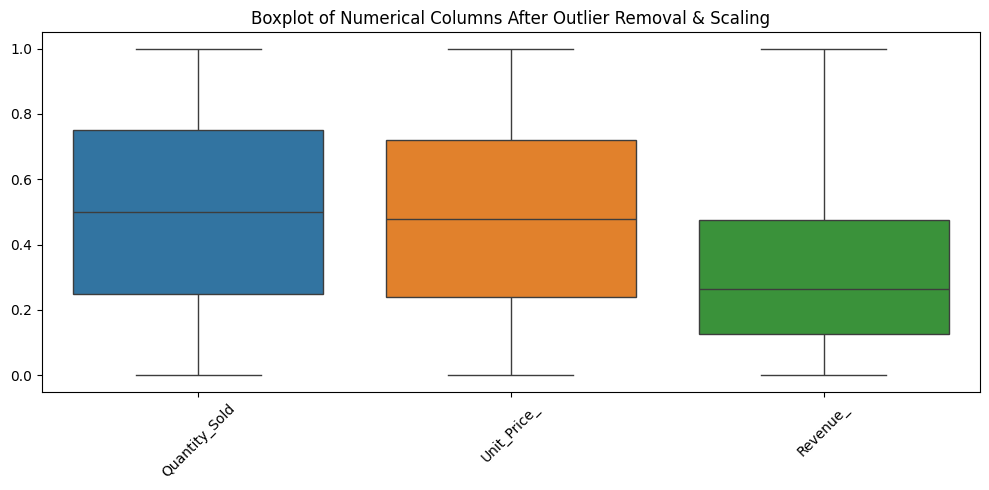

In [56]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot of Numerical Columns After Outlier Removal & Scaling")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

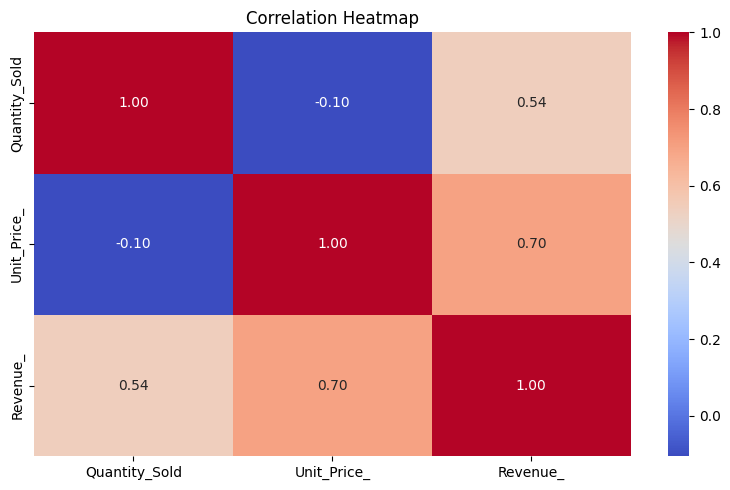

In [57]:
plt.figure(figsize=(8, 5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [59]:
# Save cleaned and scaled dataset
df.to_csv("flipkart_sales_cleaned_scaled.csv", index=False)

print("✅ Data cleaned, scaled, and saved as flipkart_sales_cleaned_scaled.csv")

✅ Data cleaned, scaled, and saved as flipkart_sales_cleaned_scaled.csv
